# pyMaBoSS

## A python interface for the MaBoSS software

Here we show how to reproduce the step shown in the [MaBoSS tutorial](https://maboss.curie.fr/pub/TutorialMaBoSS_2_0.pdf).

In [1]:
import maboss
import ginsim

### Loading/Building the `Simulation` object

The file `tuto.zginml` can be converted in MaBoSS format by GINsim. This will produce two files, `tuto.bnd` and `tuto.bnd.cfg`.

To quickly write the script below, go to MaBoSS -> load file (zginml format).

In [2]:
lrg = ginsim.load("tuto.zginml")
master_simulation = ginsim.to_maboss(lrg)

Alternatively, you could also build the `Simulation` object from scratch by describing every node of the network.

In [3]:
from maboss import Node, Network
from maboss import Simulation

nd_dnaDam = Node('DNAdam', '!p53_b1 & DNAdam', 1, 1)
nd_p53_b1 = Node('p53_b1', '!p53_b2 & !Mdm2nuc | p53_b2', 1, 1)
nd_p53_b2 = Node('p53_b2', 'p53_b1 & !Mdm2nuc', 1, 1)
nd_mdm2cyt = Node('Mdm2cyt', 'p53_b1 & p53_b2', 1, 1)
nd_mdm2nuc = Node('Mdm2nuc', '!p53_b1 & !Mdm2cyt & !DNAdam | !p53_b1 & Mdm2cyt| p53_b1 & Mdm2cyt', 1, 1)

testNet = Network([nd_dnaDam, nd_p53_b1, nd_p53_b2, nd_mdm2cyt, nd_mdm2nuc])

testNet.set_istate(['p53_b1', 'p53_b2'],
                   {(0, 0): 1, (1, 0): 0, (1, 1): 0})
testNet.set_istate('Mdm2cyt', [1, 0])
testNet.set_istate('Mdm2nuc', [1, 0])
testNet.set_istate('DNAdam', [0.4, 0.6])

byHand_sim = Simulation(testNet)

By default, (if the network was built from scratch or if the `.cfg` file did not contain the information for a given node), all nodes have the attribute `is_internal` set to `False`. This can be changed within the script

In [4]:
master_simulation.network['DNAdam'].is_internal = True

You can also use a widget to produce the same effect: go to MaBoSS -> Simulation -> set output and select all the nodes that will **not** be internal (i.e. that are output nodes).

In [5]:
#maboss.wg_set_output(master_simulation)
maboss.set_output(master_simulation, ["p53_b1", "p53_b2", "Mdm2cyt", "Mdm2nuc"])

You can change other parameters with the function update_parameters:

In [6]:
master_simulation.update_parameters(time_tick=0.1, max_time=4)

Once all the parameters are set, you can run the simulation. The following line will create two temporary files that contains everything MaBoSS needs to know to run properly. The result of the simulation are stored in a `Result` object.

To run the simulation, use the command below. This command can be quickly written by going to MaBoSS -> Simulation -> run.

In [7]:
master_results = master_simulation.run()

MaBoSS ended successfuly


To visualize the simulation, you can use the `make_trajectory` method of the results object.

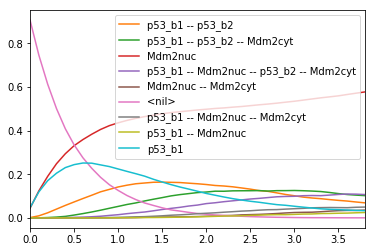

In [8]:
master_results.plot_trajectory()

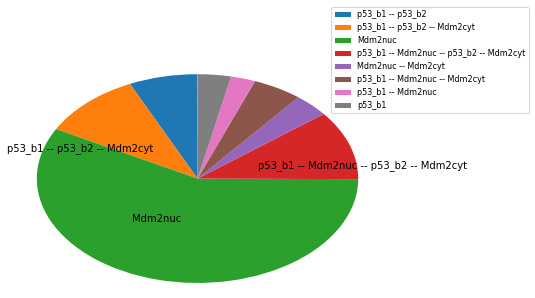

In [9]:
master_results.plot_piechart()

### Handeling mutation

To mutate a gene you can call the method `mutate` of a simulation object. It takes as argument the name of a node and a string that can be either "ON" or "OFF".

You can also use the widgets to produce mutants.

In [10]:
#mutant_simulation = maboss.wg_make_mutant(master_simulation)
mutant_simulation = maboss.copy_and_mutate(master_simulation, ["Mdm2nuc"], "ON")

In [11]:
mutant_res = mutant_simulation.run()

MaBoSS ended successfuly


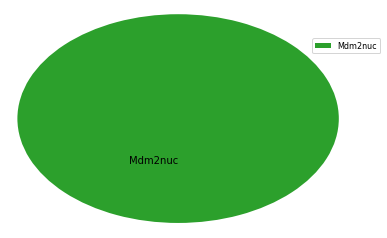

In [12]:
mutant_res.plot_piechart()